# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics

import time
from contextlib import contextmanager
import gc
import warnings
import pprint
from IPython.display import clear_output

# Configuration

In [2]:
RANDOM_STATE= 190276
ROOT_INPUT = './data/work/'

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set()
pd.set_option('display.max_columns', 122)

# Fonctions

In [3]:
# Time tracking
@contextmanager
def timer(title: str):
    t0 = time.time()
    yield
    print("{} - éxécuté en {:.0f}s".format(title, time.time() - t0))

def scale(df: pd.DataFrame) -> pd.DataFrame:
    scaler = preprocessing.StandardScaler()
    columns = df.columns
    index = df.index
    df_scaled = scaler.fit_transform(df)
    
    df_scaled = pd.DataFrame(df_scaled, columns=columns, index=index)
    
    return df_scaled

# Load DataFrame

In [4]:
df = pd.read_pickle(ROOT_INPUT + 'olist_group_by_customer_unique_id.pickle')
df

,orders_count,customer_geolocation_lat_mean,customer_geolocation_lat_count,customer_geolocation_lat_most_frequent,customer_geolocation_lng_mean,customer_geolocation_lng_count,customer_geolocation_lng_most_frequent,order_purchase_timestamp_min,order_purchase_timestamp_max,products_count_min,products_count_max,product_count_mean,seller_count_min,seller_count_max,seller_count_mean,price_item_min,price_item_max,total_orders_price,mean_orders_price,total_freight_value,mean_freight_value,seller_geolocation_lat_mean,seller_geolocation_lng_mean,product_name_lenght_mean,product_description_lenght_mean,product_photos_qty_mean,order_weight_mean,order_length_mean,order_height_mean,order_width_mean,payment_sequential_mean,payment_installments_mean,payment_value_sum,review_score_min,review_score_max,review_score_mean,purchase_days_from_today_min,purchase_days_from_today_max,purchase_days_from_today_mean,elapse_time_mean,cat_agro_industria_e_comercio_count,cat_alimentos_count,cat_alimentos_bebidas_count,cat_artes_count,cat_artes_e_artesanato_count,cat_artigos_de_festas_count,cat_artigos_de_natal_count,cat_audio_count,cat_automotivo_count,cat_bebes_count,cat_bebidas_count,cat_beleza_saude_count,cat_brinquedos_count,cat_cama_mesa_banho_count,cat_casa_conforto_count,cat_casa_conforto_2_count,cat_casa_construcao_count,cat_cds_dvds_musicais_count,cat_cine_foto_count,cat_climatizacao_count,cat_consoles_games_count,...,cat_moveis_colchao_e_estofado_count,cat_moveis_cozinha_area_de_servico_jantar_e_jardim_count,cat_moveis_decoracao_count,cat_moveis_escritorio_count,cat_moveis_quarto_count,cat_moveis_sala_count,cat_musica_count,cat_papelaria_count,cat_pc_gamer_count,cat_pcs_count,cat_perfumaria_count,cat_pet_shop_count,cat_portateis_casa_forno_e_cafe_count,cat_portateis_cozinha_e_preparadores_de_alimentos_count,cat_relogios_presentes_count,cat_seguros_e_servicos_count,cat_sinalizacao_e_seguranca_count,cat_tablets_impressao_imagem_count,cat_telefonia_count,cat_telefonia_fixa_count,cat_utilidades_domesticas_count,payment_type_boleto_count,payment_type_credit_card_count,payment_type_debit_card_count,payment_type_not_defined_count,payment_type_voucher_count,order_status_approved_count,order_status_canceled_count,order_status_created_count,order_status_delivered_count,order_status_invoiced_count,order_status_processing_count,order_status_shipped_count,order_status_unavailable_count,purchase_year_2016_count,purchase_year_2017_count,purchase_year_2018_count,purchase_month_1_count,purchase_month_2_count,purchase_month_3_count,purchase_month_4_count,purchase_month_5_count,purchase_month_6_count,purchase_month_7_count,purchase_month_8_count,purchase_month_9_count,purchase_month_10_count,purchase_month_11_count,purchase_month_12_count,purchase_quarter_1_count,purchase_quarter_2_count,purchase_quarter_3_count,purchase_quarter_4_count,purchase_day_of_week_0_count,purchase_day_of_week_1_count,purchase_day_of_week_2_count,purchase_day_of_week_3_count,purchase_day_of_week_4_count,purchase_day_of_week_5_count,purchase_day_of_week_6_count,order_frequency
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,-23.337679,1,-23.337679,-46.826739,1,-46.826739,2018-05-10 10:56:27,2018-05-10 10:56:27,1.0,1.0,1.0,1.0,1.0,1.0,129.90,129.90,129.90,129.90,12.00,12.00,-22.709287,-47.665206,60.0,236.0,1.0,1500.0,34.0,7.0,32.0,1.0,8.0,141.90,5.0,5.0,5.0,1931,1931,1931.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,-23.557876,1,-23.557876,-46.788754,1,-46.788754,2018-05-07 11:11:27,2018-05-07 11:11:27,1.0,1.0,1.0,1.0,1.0,1.0,18.90,18.90,18.90,18.90,8.29,8.29,-23.490680,-46.583621,56.0,635.0,1.0,375.0,26.0,11.

In [5]:
df.describe()

,orders_count,customer_geolocation_lat_mean,customer_geolocation_lat_count,customer_geolocation_lat_most_frequent,customer_geolocation_lng_mean,customer_geolocation_lng_count,customer_geolocation_lng_most_frequent,order_purchase_timestamp_min,order_purchase_timestamp_max,products_count_min,products_count_max,product_count_mean,seller_count_min,seller_count_max,seller_count_mean,price_item_min,price_item_max,total_orders_price,mean_orders_price,total_freight_value,mean_freight_value,seller_geolocation_lat_mean,seller_geolocation_lng_mean,product_name_lenght_mean,product_description_lenght_mean,product_photos_qty_mean,order_weight_mean,order_length_mean,order_height_mean,order_width_mean,payment_sequential_mean,payment_installments_mean,payment_value_sum,review_score_min,review_score_max,review_score_mean,purchase_days_from_today_min,purchase_days_from_today_max,purchase_days_from_today_mean,elapse_time_mean,cat_agro_industria_e_comercio_count,cat_alimentos_count,cat_alimentos_bebidas_count,cat_artes_count,cat_artes_e_artesanato_count,cat_artigos_de_festas_count,cat_artigos_de_natal_count,cat_audio_count,cat_automotivo_count,cat_bebes_count,cat_bebidas_count,cat_beleza_saude_count,cat_brinquedos_count,cat_cama_mesa_banho_count,cat_casa_conforto_count,cat_casa_conforto_2_count,cat_casa_construcao_count,cat_cds_dvds_musicais_count,cat_cine_foto_count,cat_climatizacao_count,cat_consoles_games_count,...,cat_moveis_colchao_e_estofado_count,cat_moveis_cozinha_area_de_servico_jantar_e_jardim_count,cat_moveis_decoracao_count,cat_moveis_escritorio_count,cat_moveis_quarto_count,cat_moveis_sala_count,cat_musica_count,cat_papelaria_count,cat_pc_gamer_count,cat_pcs_count,cat_perfumaria_count,cat_pet_shop_count,cat_portateis_casa_forno_e_cafe_count,cat_portateis_cozinha_e_preparadores_de_alimentos_count,cat_relogios_presentes_count,cat_seguros_e_servicos_count,cat_sinalizacao_e_seguranca_count,cat_tablets_impressao_imagem_count,cat_telefonia_count,cat_telefonia_fixa_count,cat_utilidades_domesticas_count,payment_type_boleto_count,payment_type_credit_card_count,payment_type_debit_card_count,payment_type_not_defined_count,payment_type_voucher_count,order_status_approved_count,order_status_canceled_count,order_status_created_count,order_status_delivered_count,order_status_invoiced_count,order_status_processing_count,order_status_shipped_count,order_status_unavailable_count,purchase_year_2016_count,purchase_year_2017_count,purchase_year_2018_count,purchase_month_1_count,purchase_month_2_count,purchase_month_3_count,purchase_month_4_count,purchase_month_5_count,purchase_month_6_count,purchase_month_7_count,purchase_month_8_count,purchase_month_9_count,purchase_month_10_count,purchase_month_11_count,purchase_month_12_count,purchase_quarter_1_count,purchase_quarter_2_count,purchase_quarter_3_count,purchase_quarter_4_count,purchase_day_of_week_0_count,purchase_day_of_week_1_count,purchase_day_of_week_2_count,purchase_day_of_week_3_count,purchase_day_of_week_4_count,purchase_day_of_week_5_count,purchase_day_of_week_6_count,order_frequency
count,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958,92958,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,...,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000

# Test Clustering

## Normalisation du jeu de données

In [61]:
df_test1 = scale(df.select_dtypes('number'))

In [62]:
df_test1.describe().round(6)

,orders_count,customer_geolocation_lat_mean,customer_geolocation_lat_count,customer_geolocation_lat_most_frequent,customer_geolocation_lng_mean,customer_geolocation_lng_count,customer_geolocation_lng_most_frequent,products_count_min,products_count_max,product_count_mean,seller_count_min,seller_count_max,seller_count_mean,price_item_min,price_item_max,total_orders_price,mean_orders_price,total_freight_value,mean_freight_value,seller_geolocation_lat_mean,seller_geolocation_lng_mean,product_name_lenght_mean,product_description_lenght_mean,product_photos_qty_mean,order_weight_mean,order_length_mean,order_height_mean,order_width_mean,payment_sequential_mean,payment_installments_mean,payment_value_sum,review_score_min,review_score_max,review_score_mean,purchase_days_from_today_min,purchase_days_from_today_max,purchase_days_from_today_mean,elapse_time_mean,cat_agro_industria_e_comercio_count,cat_alimentos_count,cat_alimentos_bebidas_count,cat_artes_count,cat_artes_e_artesanato_count,cat_artigos_de_festas_count,cat_artigos_de_natal_count,cat_audio_count,cat_automotivo_count,cat_bebes_count,cat_bebidas_count,cat_beleza_saude_count,cat_brinquedos_count,cat_cama_mesa_banho_count,cat_casa_conforto_count,cat_casa_conforto_2_count,cat_casa_construcao_count,cat_cds_dvds_musicais_count,cat_cine_foto_count,cat_climatizacao_count,cat_consoles_games_count,cat_construcao_ferramentas_construcao_count,cat_construcao_ferramentas_ferramentas_count,...,cat_moveis_colchao_e_estofado_count,cat_moveis_cozinha_area_de_servico_jantar_e_jardim_count,cat_moveis_decoracao_count,cat_moveis_escritorio_count,cat_moveis_quarto_count,cat_moveis_sala_count,cat_musica_count,cat_papelaria_count,cat_pc_gamer_count,cat_pcs_count,cat_perfumaria_count,cat_pet_shop_count,cat_portateis_casa_forno_e_cafe_count,cat_portateis_cozinha_e_preparadores_de_alimentos_count,cat_relogios_presentes_count,cat_seguros_e_servicos_count,cat_sinalizacao_e_seguranca_count,cat_tablets_impressao_imagem_count,cat_telefonia_count,cat_telefonia_fixa_count,cat_utilidades_domesticas_count,payment_type_boleto_count,payment_type_credit_card_count,payment_type_debit_card_count,payment_type_not_defined_count,payment_type_voucher_count,order_status_approved_count,order_status_canceled_count,order_status_created_count,order_status_delivered_count,order_status_invoiced_count,order_status_processing_count,order_status_shipped_count,order_status_unavailable_count,purchase_year_2016_count,purchase_year_2017_count,purchase_year_2018_count,purchase_month_1_count,purchase_month_2_count,purchase_month_3_count,purchase_month_4_count,purchase_month_5_count,purchase_month_6_count,purchase_month_7_count,purchase_month_8_count,purchase_month_9_count,purchase_month_10_count,purchase_month_11_count,purchase_month_12_count,purchase_quarter_1_count,purchase_quarter_2_count,purchase_quarter_3_count,purchase_quarter_4_count,purchase_day_of_week_0_count,purchase_day_of_week_1_count,purchase_day_of_week_2_count,purchase_day_of_week_3_count,purchase_day_of_week_4_count,purchase_day_of_week_5_count,purchase_day_of_week_6_count,order_frequency
count,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,...,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.000000,92958.

## Kmeans

### Recherche manuelle

In [7]:
from sklearn.cluster import KMeans
X = df_test1.values

silhouette = pd.DataFrame()

for n_clusters in range(2,10,1):
    for i in range(5):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        silhouette.loc[n_clusters, f'test {i+1}'] = metrics.silhouette_score(X=X, labels=kmeans.labels_, sample_size=1000)
silhouette['mean'] = silhouette.mean(axis=1)
silhouette['std'] = silhouette.std(axis=1)

silhouette

,test 1,test 2,test 3,test 4,test 5,mean,std
2,0.056192,0.243755,0.053351,0.054330,0.050221,0.091570,0.076117
3,0.047150,0.043469,0.045998,0.041964,0.050888,0.045894,0.003093
4,0.040416,0.045938,0.043168,0.048032,0.038376,0.043186,0.003517
5,0.049960,0.032697,0.043431,0.023175,0.046937,0.039240,0.009926
6,0.024918,0.038493,0.047504,0.025468,0.039863,0.035249,0.008768
7,0.014490,0.024507,0.008491,0.036836,0.012168,0.019298,0.010251
8,0.037419,0.056126,0.026240,0.025026,0.041171,0.037196,0.011334
9,0.036543,0.039699,0.031695,0.023960,0.046676,0.035715,0.007629


<Axes: >

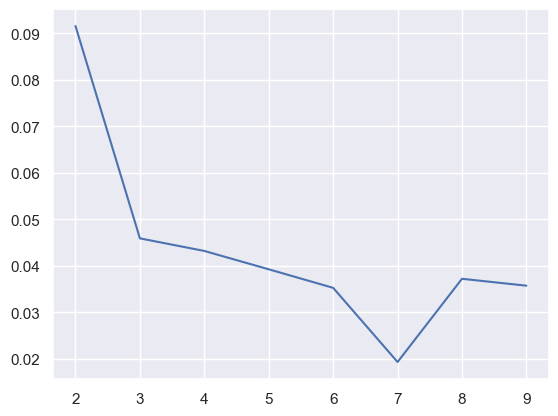

In [8]:
silhouette['mean'].plot()

### Recherche avec la librairie Yellowbrick

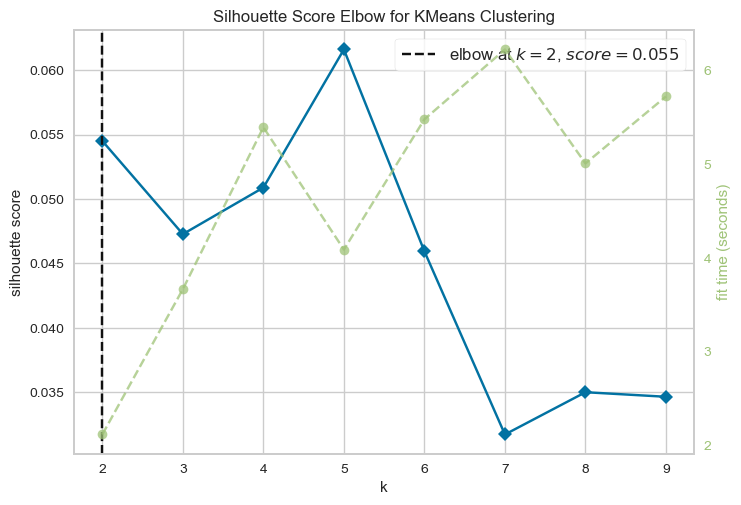

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=True)

visualizer.fit(X)
visualizer.poof()

Les coefficients de silhouette sont plutot mauvais. Le clustering Kmeans sur le dataset complet n'est pas concluant

# Test clustering avec un dataset RFM

## Création et normalisation du dataset RFM

In [6]:
df_rfm = pd.DataFrame()
df_rfm['recence'] = df['purchase_days_from_today_min']
df_rfm['frequence'] = df['order_frequency']
df_rfm['montant'] = df['mean_orders_price']
df_rfm

,recence,frequence,montant
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,1931,0.0,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1934,0.0,18.90
0000f46a3911fa3c0805444483337064,2357,0.0,69.00
0000f6ccb0745a6a4b88665a16c9f078,2141,0.0,25.99
0004aac84e0df4da2b147fca70cf8255,2108,0.0,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2267,0.0,1570.00
fffea47cd6d3cc0a88bd621562a9d061,2082,0.0,64.89
ffff371b4d645b6ecea244b27531430a,2388,0.0,89.90


## Visualisation

Text(0.5, 0, 'Montant')

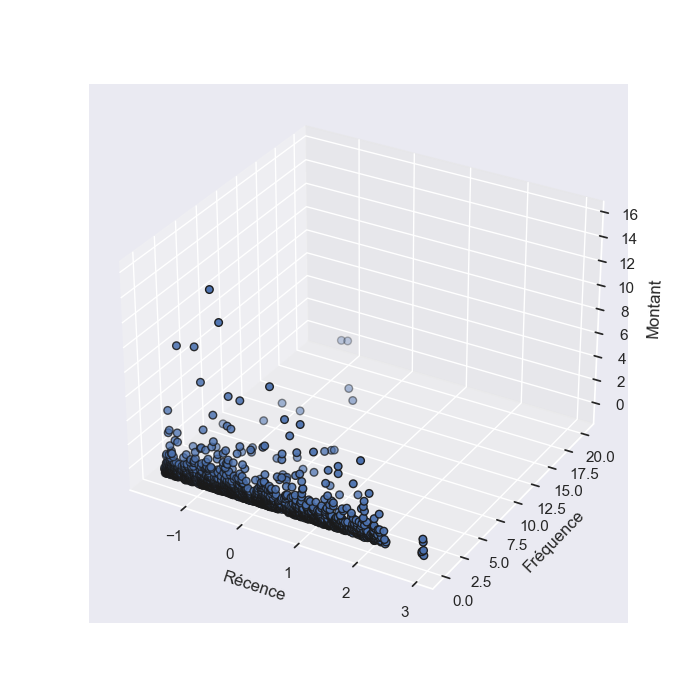

In [8]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import Axes3D

df_rfm_sample = scale(df_rfm.sample(2000))
plt.ion()


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_rfm_sample['recence'], df_rfm_sample['frequence'], df_rfm_sample['montant'], marker='o', s=30, edgecolor='k')
ax.set_xlabel('Récence')
ax.set_ylabel('Fréquence')
ax.set_zlabel('Montant')



## Kmeans

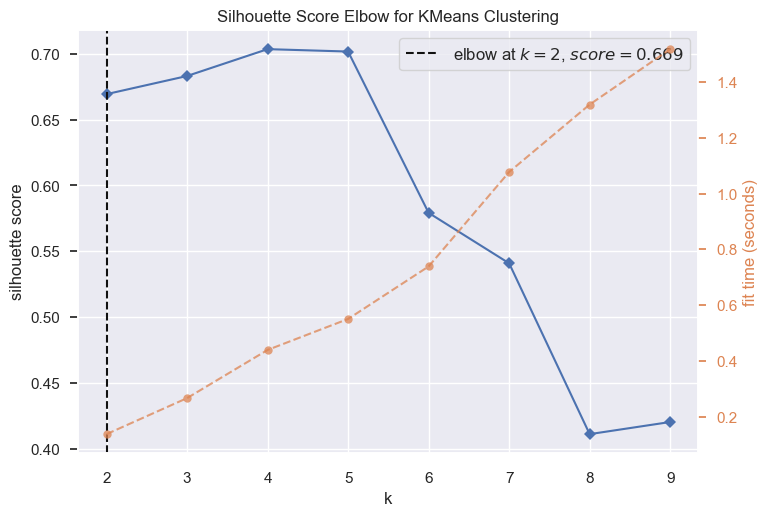

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

X = (scale(df_rfm.select_dtypes('number'))).values

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=True)

visualizer.fit(X)
visualizer.poof()

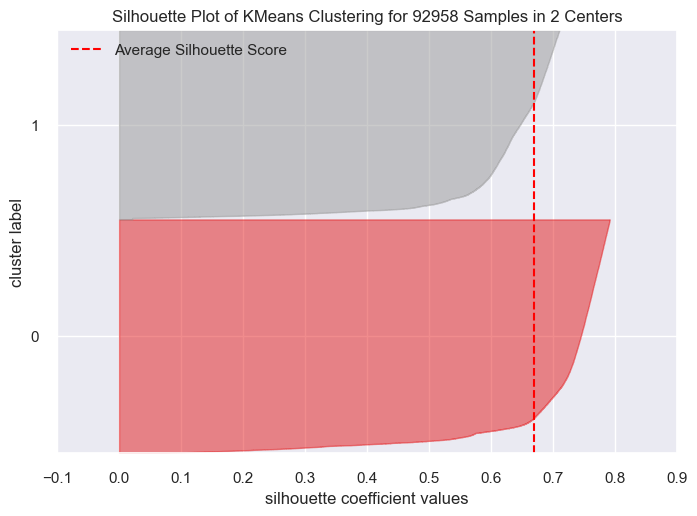

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 92958 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
model = KMeans(2)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)
visualizer.poof()    

## DBSCAN

Analyse basée sur les explications de cet article: https://sefidian.com/2022/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

Aide sur memory overflow: https://stackoverflow.com/questions/16381577/scikit-learn-dbscan-memory-usage

## Distance optimum

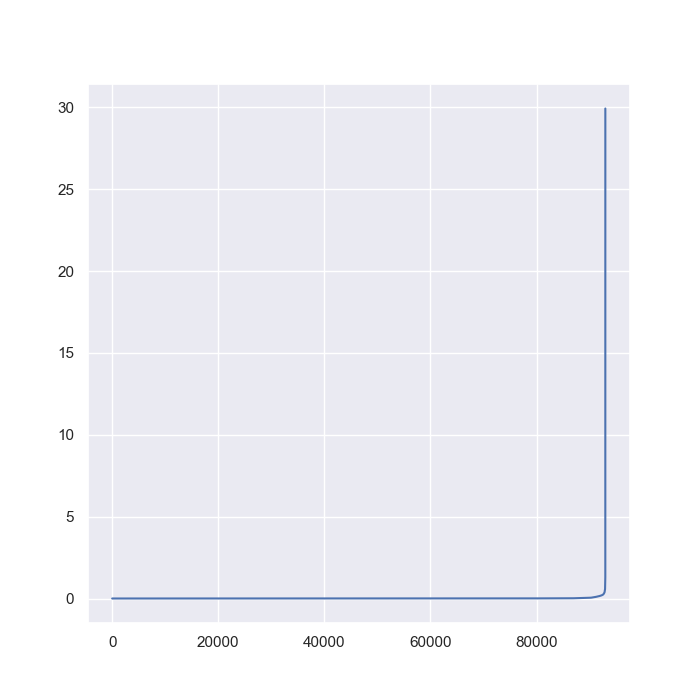

In [17]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

df_dbscan = scale(df_rfm.select_dtypes('number'))

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df_dbscan)
distances, indices = neighbors_fit.kneighbors(df_dbscan)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(7, 7))
plt.plot(range(len(distances)), distances)
plt.show()

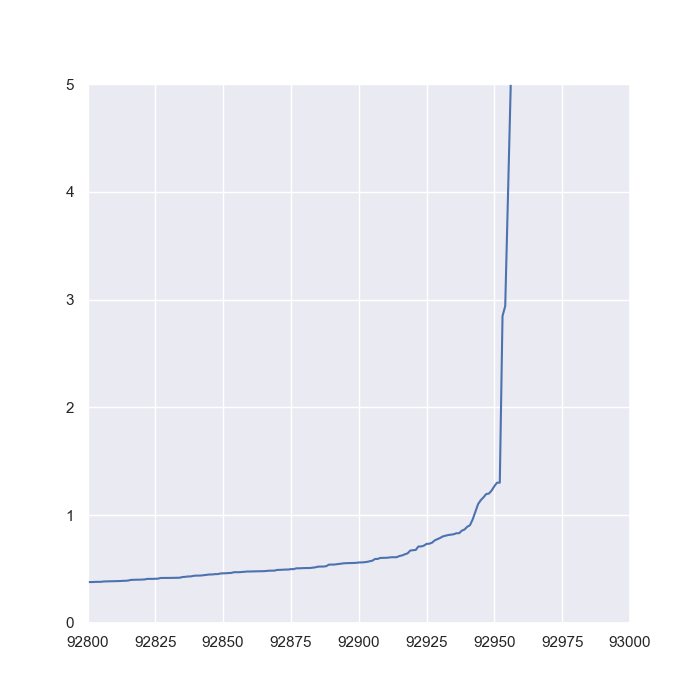

In [22]:
fig = plt.figure(figsize=(7, 7))
plt.xlim(92800, 93000)
plt.ylim(0, 5)
plt.plot(range(len(distances)),distances)
plt.show()

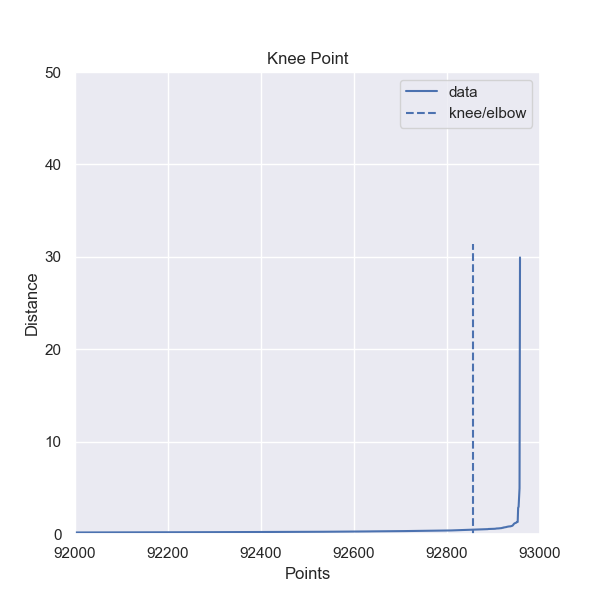

0.4713566418168682


In [24]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, curve='convex', direction='increasing')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.xlim(92000, 93000)
plt.ylim(0, 50)
plt.show()

print(distances[knee.knee])

In [ ]:
from sklearn.cluster import DBSCAN

X = df_dbscan.values

dbscan = DBSCAN(eps=0.4713, min_samples=6, n_jobs=2)
dbscan.fit(X)

In [ ]:
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
n_clusters_

In [ ]:
n_noise_

In [ ]:
df_db = df_dbscan.copy()
df_db['label'] = labels

df_no_noise = df_db[df_db['label'] != -1]
X_no_noise = df_no_noise.drop(['label'], axis=1).values
labels_no_noise = df_no_noise['label'].values

metrics.silhouette_score(X=X_no_noise, labels=labels_no_noise, sample_size=3000)

# Projection

## Test PCA

In [6]:
df.dtypes.value_counts()

float64           110
int64              39
datetime64[ns]      2
Name: count, dtype: int64

In [7]:
df_pca = df.select_dtypes(['number'])
df_pca = scale(df_pca)
pca_columns = df_pca.columns.to_list()

In [8]:
from sklearn import decomposition
PCA = decomposition.PCA(n_components=df_pca.shape[1])
PCA.fit(df_pca.values)

PCA(n_components=149)

Text(0.5, 1.0, '')

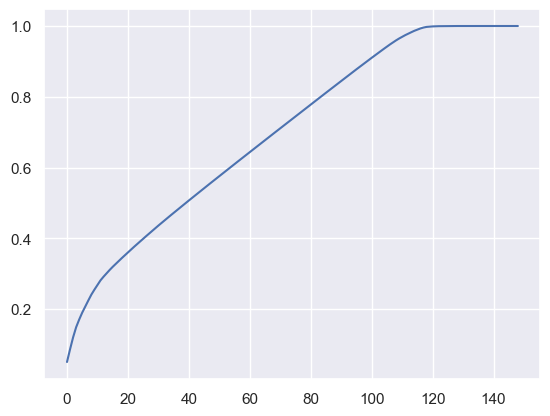

In [9]:
pd.Series(PCA.explained_variance_ratio_).cumsum().plot()
plt.title('')

In [15]:
print(f'Explication de la variance sur les 2 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1])*100:.2f}%')

Explication de la variance sur les 2 premiers axes = 8.65%


In [16]:
print(f'Explication de la variance sur les 3 premiers axes = {(PCA.explained_variance_ratio_[0] + PCA.explained_variance_ratio_[1] + PCA.explained_variance_ratio_[2])*100:.2f}%')

Explication de la variance sur les 3 premiers axes = 12.03%


La PCA est inneficace pour projeter les données sur 2 ou 3 axes. La variance exprimée dans ce cas est trop faible, le jeu de données est mal représenté

## Test T-SNE